# Basic Idea

A word is a sequence of characters. Bigram is using the previous char to predict the next char.

In [19]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
with open("names.txt") as f:
    words = f.read().split()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
max(words, key=len)

'muhammadibrahim'

In [5]:
min(words, key=len)

'an'

In [6]:
# what does bigram look like
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

. e
e m
m m
m a
a .


In [7]:
char_set = sorted(set(''.join(words)))
ctoi = {c:i+1 for i, c in enumerate(char_set)}
ctoi['.'] = 0
itoc = {i:c for c, i in ctoi.items()}

In [8]:
itoc

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [9]:
M = torch.zeros(27, 27, dtype=torch.int32)

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = ctoi[ch1], ctoi[ch2]
        M[ix1, ix2] += 1


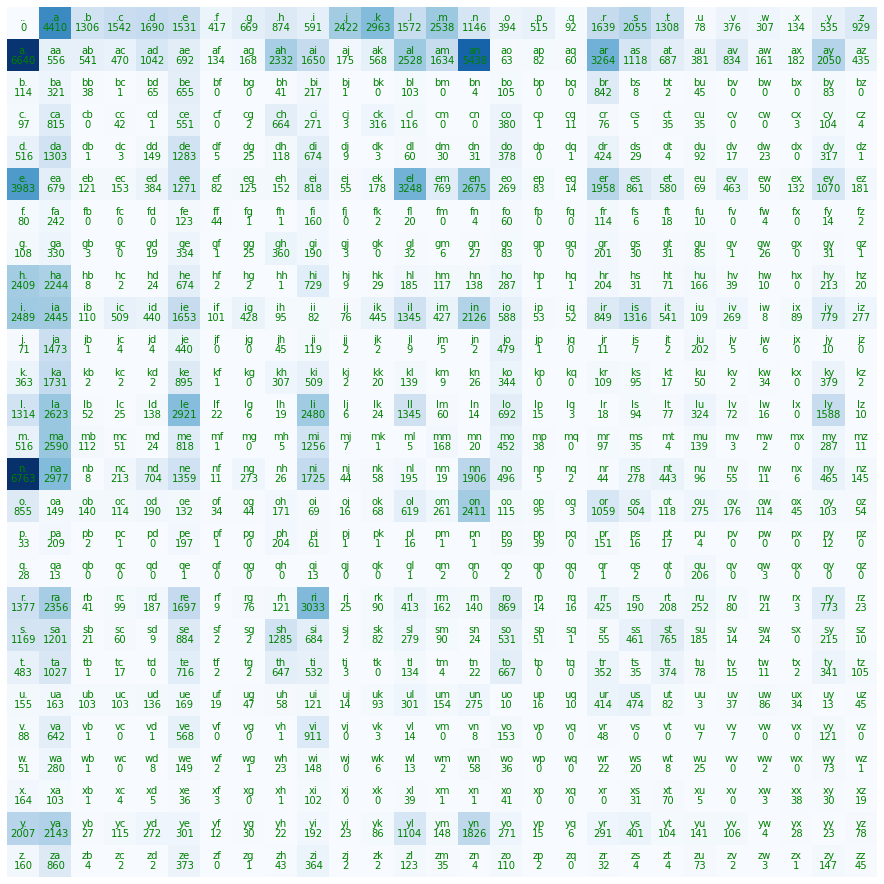

In [12]:
plt.figure(figsize=(16,16))
plt.imshow(M, cmap='Blues')
plt.axis("off")
for i in range(27):
    for j in range(27):
        s = itoc[i] + itoc[j]
        plt.text(j, i, s, ha='center', va='bottom', color='green')
        plt.text(j,i, M[i, j].item(), ha='center', va='top', color='green')

In [66]:
P.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

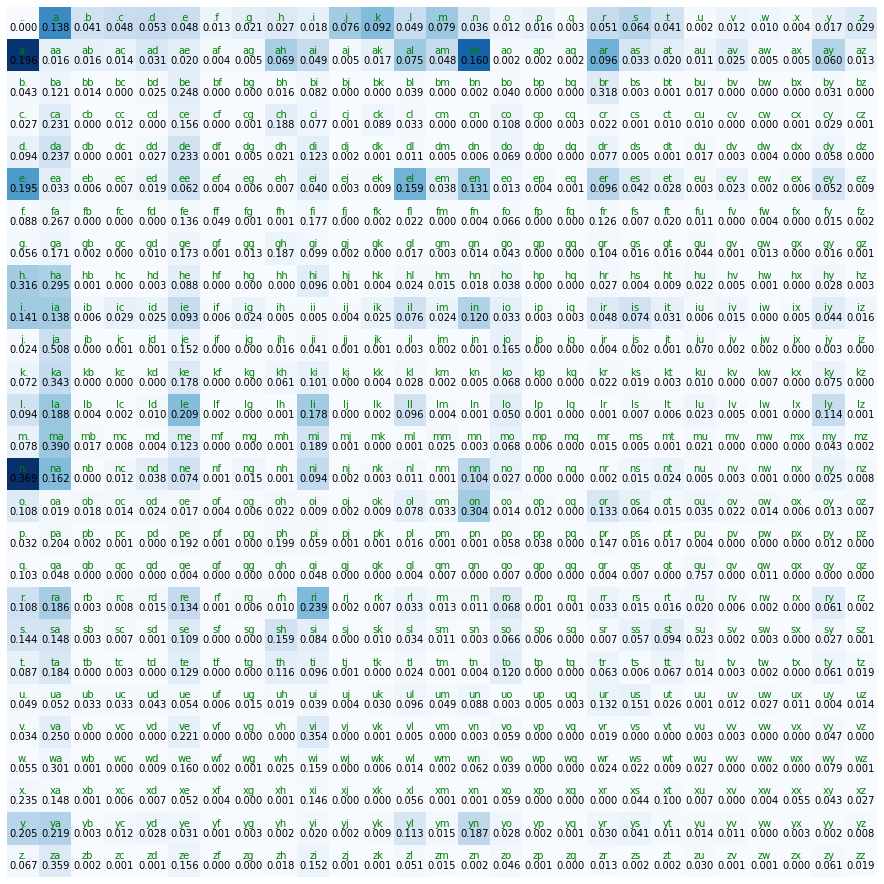

In [68]:
# the prob
P = M / M.sum(dim=1, keepdim=True)
plt.figure(figsize=(16,16))
plt.imshow(M, cmap='Blues')
plt.axis("off")
for i in range(27):
    for j in range(27):
        s = itoc[i] + itoc[j]
        plt.text(j, i, s, ha='center', va='bottom', color='green')
        plt.text(j,i, f"{P[i, j].item():.3f}", ha='center', va='top', color='black')

In [13]:

# Add 1 is for smoothing purpose and avoid prob of 0
P = (M+1) / (M+1).sum(dim=1, keepdim=True)
g = torch.Generator().manual_seed(1234)
idx = 0

for i in range(30):
    out = []
    while True:
        idx = torch.multinomial(P[idx], 1, replacement=True, generator = g).item()
        c = itoc[idx]
        out.append(c)
        if c == '.':
            print("".join(out))
            break

d.
jaiaacdro.
neegeariceja.
alethyarefy.
alaley.
rapra.
bi.
sh.
zliy.
s.
oyay.
shartelalenipiilvlyrrii.
riramiyvabya.
hich.
ameyahiyptaio.
cakianollyde.
lesamameynigarimmharis.
ca.
mmie.
sahinin.
ri.
ha.
ja.
kumyambama.
made.
pheipa.
m.
abynngucoson.
jaloseeeviyo.
obi.


In [14]:
len(words)

32033

In [15]:
words[:3]

['emma', 'olivia', 'ava']

In [16]:
log_likelihood = 0.0
n = 0
nll = 0.0
for word in ["andrejq"]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        prob = P[ctoi[ch1], ctoi[ch2]]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}{ch2} {prob:.4f} {logprob:.4f}")
nll = -log_likelihood / n
print(f"{log_likelihood:.4f} {nll:.4f}")

.a 0.1376 -1.9835
an 0.1604 -1.8302
nd 0.0384 -3.2594
dr 0.0770 -2.5646
re 0.1334 -2.0143
ej 0.0027 -5.9004
jq 0.0003 -7.9817
q. 0.0970 -2.3331
-27.8672 3.4834


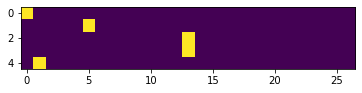

In [40]:
## create dataset for nn, give the prev char to predict next char

xs, ys = [], []

for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(ctoi[ch1])
        ys.append(ctoi[ch2])
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

g = torch.Generator().manual_seed(1234)
W = torch.randn((27,27), generator=g, requires_grad=True)

xenc = F.one_hot(xs, num_classes=27).float()
plt.imshow(xenc[:5])

In [63]:
## train the shallow model

for i in range(400):
    
    logits = (xenc @ W).exp()
    probs = logits / logits.sum(1, keepdim=True)
    loss = -probs[torch.arange(len(xs)), ys].log().mean()
    print(loss.item())
    
    W.grad = None
    loss.backward()
    W.data += -10 * W.grad
    

2.478945016860962
2.478875160217285
2.4788057804107666
2.478736400604248
2.478667974472046
2.4785995483398438
2.4785313606262207
2.478463649749756
2.47839617729187
2.4783291816711426
2.4782626628875732
2.478195905685425
2.4781298637390137
2.4780638217926025
2.477998733520508
2.477933645248413
2.4778687953948975
2.477804183959961
2.4777400493621826
2.4776763916015625
2.4776127338409424
2.4775495529174805
2.4774863719940186
2.477423906326294
2.4773614406585693
2.477299690246582
2.4772379398345947
2.4771764278411865
2.4771149158477783
2.4770543575286865
2.4769937992095947
2.476933240890503
2.4768733978271484
2.476813554763794
2.4767544269561768
2.4766950607299805
2.4766364097595215
2.4765775203704834
2.4765191078186035
2.476461410522461
2.4764034748077393
2.4763457775115967
2.4762885570526123
2.476231575012207
2.476174831390381
2.476118326187134
2.476062297821045
2.476006031036377
2.4759507179260254
2.4758951663970947
2.475839853286743
2.4757847785949707
2.4757301807403564
2.4756755828857

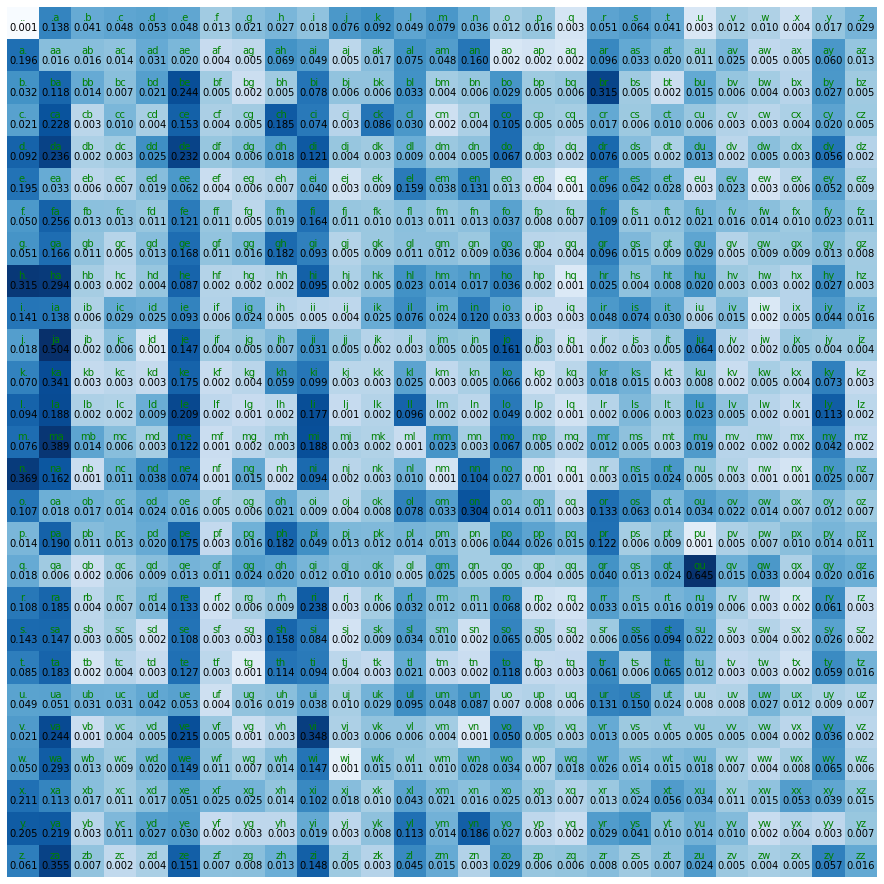

In [70]:
p = W.exp() / W.exp().sum(1, keepdim=True)
plt.figure(figsize=(16,16))
plt.imshow(W.detach().numpy(), cmap='Blues')
plt.axis("off")
for i in range(27):
    for j in range(27):
        s = itoc[i] + itoc[j]
        plt.text(j, i, s, ha='center', va='bottom', color='green')
        plt.text(j,i, f"{p[i, j].item():.3f}", ha='center', va='top', color='black')